# Keras Tutorial

In this notebook, I will go over a tutroial of how to use the Keras library. Keras is a high-level neural networks API, with the goal of the library being to enable quick experimentation. First: how to install Keras for this notebook.

# Installation
Some things to consider before attempting to run this notebook: it was tested and run on a Windows machine. Since it is all installed through Anaconda, I don't imagine that there would be any problems with running it on other platforms, but if such an issue does occur, consult the Keras website for installation instructions, and follow the instructions for installing Keras with the TensorFlow backend on the appropriate platform. This can be found here: https://keras.io/#installation

First, this tutorial requires Anaconda, which can be found here: https://www.anaconda.com/download/

Secondly, you need to install tensorflow within a conda environment. You can do this with the following command:

$ conda create -n tensorflow pip python=3.5

$ activate tensorflow

At this point your prompt should change, and include (tensorflow)

(tensorflow) $ pip install --ignore-installed --upgrade tensorflow

Congrats, you've installed a tensorflow environment! Now to installing iPython, Jupyter (yes, you need to install it again so it works in this environment) and finally keras. You can do this with the following commands:

(tensorflow) $ conda install ipython

(tensorflow) $ pip install jupyter

(tensorflow) $ pip install keras

(tensorflow) $ pip install matplotlib

Now you just need to deactivate and activate the tersorflow environment, and then you are ready to run this notebook! Here are the commands to do so:

(tensorflow) $ conda deactivate

$ conda activate tensorflow

(tensorflow) $ jupyter notebook

# What Is Keras? Why Does It Matter?
Keras is a python library that excels at expiditing the process from idea to experiment. It is currently widely used in the industry as well. According to the arXis uploads, keras is the second most mentioned library in deep learning papers. Additionally, it can be found in use at Netflix, Uber, NASA, and others. It is used commonly, so being able to understand the code can help further your understanding of what exactly these deep learning algorithms are doing.

# What Is Deep Learning?
Deep learning is a class of machine learning algorithms that can be either supervised or unsupervised and use multiple layers of nonlinear filters (called perceptrons) that perform feature extraction on the input. Each new layer uses the output from the previous layer as it's input. These layers can also be considered as different levels of extraction. A more in depth explanation can be found here: http://www.deeplearningbook.org/

# Importing Libraries
Now that we have a basic understanding of the basic principles of what keras is used for: lets see some examples! To do this, we need to import the required libraries. Time to finally get to some code.

In [70]:
import numpy as np
np.random.seed(123) # so the results don't vary

from keras.models import Sequential # a linear stack of nerual network layers

from keras.layers import Dense, Dropout, Activation, Flatten # core layers 

from keras.layers import Conv2D, MaxPooling2D # convolution neural network layers

from keras.utils import np_utils # utilites!

# Now, let there be data!
Now that we have imported the basic tools, we need to decide what to use them on. Luckily, keras has some built in datsets we can use for just this purpose. I thought instead of doing the classic example, where handwriting is recogniaed, it could be more interesting to see how well it does on recognizing what kind of article of clothing is in a picture. This data set is included with keras, and consists of 60,000 28x28 greyscale images that depict one of 10 categories. It also has a test set of 10,000 images. Running the next cell results in a download of these images if they aren't already local. It saves them in .keras/datasets If they are already there, it will just load them without redownloading them. 

In [71]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [72]:
print(X_train.shape) # (number of images, x dimension, y dimension)

(60000, 28, 28)


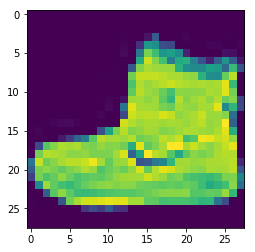

In [73]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0]) #lets look at some data!

Notice that in the following print statements, that the label data appears as a one dimensional array of class values. This is problematic since we want them to be a ten-dimensional matrix of class values (ten since there are ten possible class values) We can acheive this with the utility function to_categorical()

In [74]:
print(Y_train.shape)

(60000,)


In [75]:
print(Y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [76]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(Y_train.shape) #there, all better!

(60000, 10)


Now that our labels are looking good, time to fix up our input data. It's good practice to explicity declare a value for the dimensionality of the input image. For example: our pictures are in greyscale, therefore they only consist of brightness values. So it has a dimensionality of 1. As opposed to an RGB image (3). To declare this, we want the shape of our data to be (n, dim, width, height) as opposed to (n, width, height) as it is currently. Luckily, there's a handy reshape function. Once that's done, we want to convert the data points into values in the range [0,1] and declare them as float32.

In [77]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print(X_train.shape) #and there's the one, as expected!

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

(60000, 28, 28, 1)


# Model Architecture!
Now that we have imported our libraries and formatted our data, it's time to actually build the model! This part is where all the theory and math of neural nets comes in. Luckily for us, Keras has you covered if you aren't farmiliar with the theory. There are a bunch of example architectures (one of which I am using for this tutorial) at this link: https://github.com/keras-team/keras/tree/master/examples

In [79]:
# declare a sequential moedl format
model = Sequential()

# declare the input layer
# the first parameter is the number of convolution filters
# note that here the input shape parameter is the same as the shape of our input data
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))

#check the shape of the current model
print(model.output.shape)

#ADD MORE LAYERS!!!!
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) 
# MaxPooling2D reduces num of parameters by sliding a 2x2 filter across the previous layer, and takes the max of the 4 values

model.add(Dropout(0.25)) # method of regularizationm, prevents overfitting.

model.add(Flatten()) # Flattens input without
print(model.output.shape) #see?

#the first param of Dense is the output size of the layer. Dense is a normially connecter NN layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #ten here is the number of classes

(?, 26, 26, 32)
(?, ?)


# Time to Compile
Now that the model is built, we just need to compile it! (We also ned to define an optimizer and loss function, but keras has some neat built options to choose from. Check the keras documentation for a full list. For this tutorial we will be using categorical cross entropy for our loss function, and Adam as our optimizer. 

In [80]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Model, Meet Training Data
Now time to fit them together! Note that for me, each epoch took about a minute, so all together, this took about 10 minutes.

In [84]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1621 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1547 - acc: 0.9419
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1510 - acc: 0.9429
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1441 - acc: 0.9462
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1401 - acc: 0.9469
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1337 - acc: 0.9487
Epoch 7/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1334 - acc: 0.9498
Epoch 8/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1259 - acc: 0.9521
Epoch 9/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1264 - acc: 0.9523
Epoch 10/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1226 - acc: 0.9542

# Time to Take Score
Time to use that test data and see how our model does!

In [85]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.24415835095718502
Test accuracy:  0.9276


# Conclusion
For me , the model gets around a 92% so not too bad. But importantly, you can see that building models in Keras is a relatively painless process. Most of the work is spent formatting data and fine tuning the models. As such I would say that keras achieves its goal of being a quick way to go from idea to experiment. Additionally, congrats, you now have a model that can identify clothing types of greyscale images! 

# Finally, Some Common Pitfalls
Along the way I found a few complications:
- Many online recources for keras will use a diffrent backend. For example, if using a the Theano backend, then the 1 needs to be in a different place when formatting the data. You can check this requirement with:

In [86]:
from keras import backend as K
print(K.image_data_format())

channels_last


- You are stuck using the provided loss functions, although the list is quite extensive, and can be found here: https://keras.io/losses/
- Without an extensive knowledge of deep learning arhitectures, you might be stuck using the examples. A good way to get around this is to play with the input to these layers and see what effect it has. 
- You'll note that we used numbers to represent the category of clothes. This could create problems if you don't specify that it is categorical with the to_categorical function.

# Happy Deep Learning!